In [1]:
# Importing Necessary Libraries
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

In [2]:
# Loading the Dataset
df = pd.read_csv("/Users/shubham/Documents/Segmentation/customer_data.csv")

In [3]:
# Dataset Overview

df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#summery statistics
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [6]:
df['PURCHASES'].describe()

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64

In [7]:
zero_purchases_count = (df['PURCHASES'] == 0).sum()
print(zero_purchases_count)

2044


In [8]:
df = df[df['PURCHASES'] != 0]

In [9]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

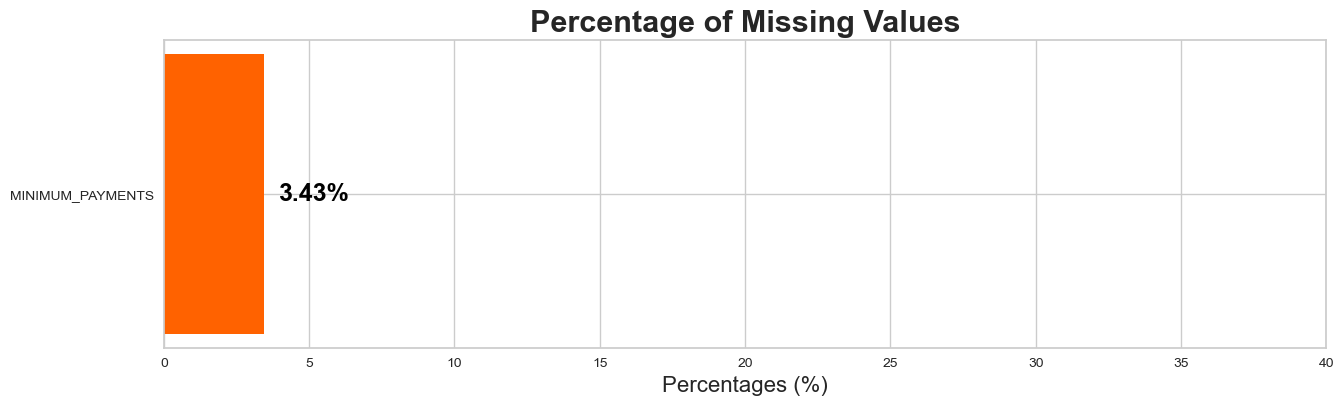

In [10]:
# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [11]:
#df = df.dropna(subset=['CREDIT_LIMIT'])

In [12]:
# Handling Missing Values
# Fill missing values in the 'MINIMUM_PAYMENTS' column with the median value
median_minimum_payments = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median_minimum_payments, inplace=True)


In [13]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]


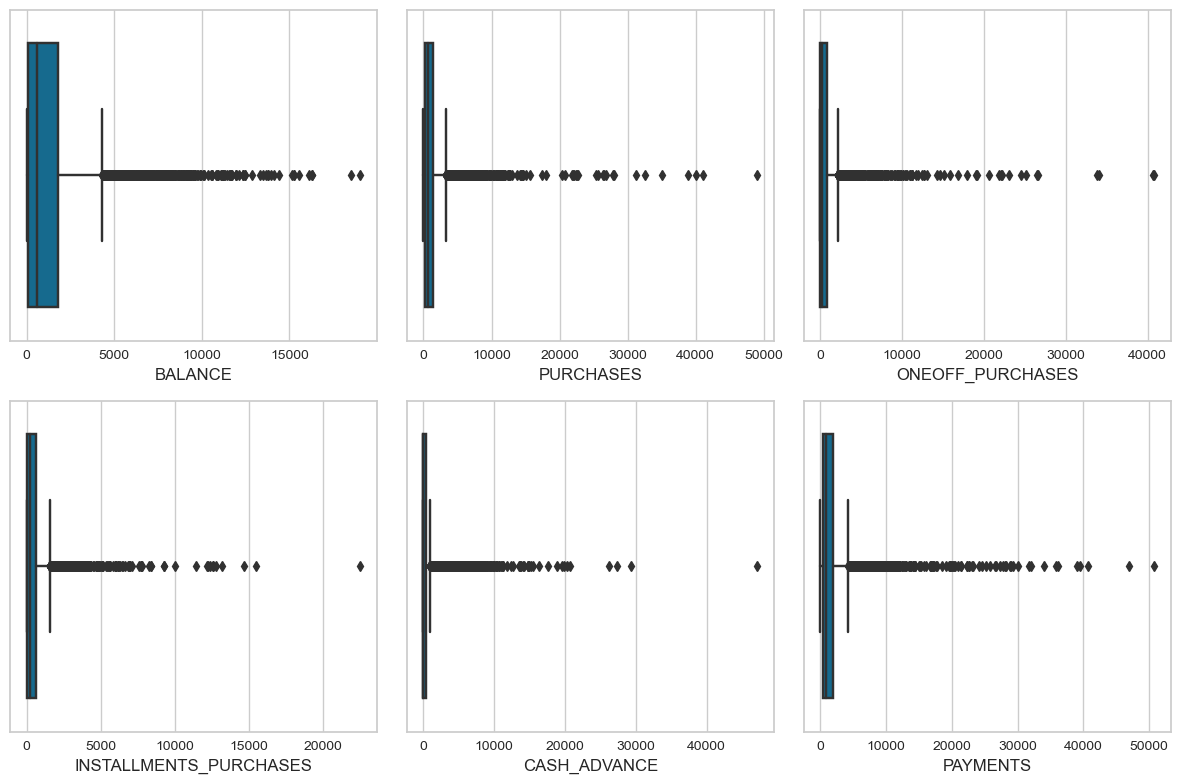

In [14]:
# Step 4 | Outlier Handling

# Step 4.1 | Visualizing Outliers
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['BALANCE'])

plt.subplot(2, 3, 2)
sns.boxplot(x=df['PURCHASES'])

plt.subplot(2, 3, 3)
sns.boxplot(x=df['ONEOFF_PURCHASES'])

plt.subplot(2, 3, 4)
sns.boxplot(x=df['INSTALLMENTS_PURCHASES'])

plt.subplot(2, 3, 5)
sns.boxplot(x=df['CASH_ADVANCE'])

plt.subplot(2, 3, 6)
sns.boxplot(x=df['PAYMENTS'])

plt.tight_layout()
plt.show()

In [15]:
# Define a function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Handle outliers for selected columns
columns_with_outliers = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']
for column in columns_with_outliers:
    handle_outliers(df, column)

In [16]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
df['CUST_ID'] = df['CUST_ID'].astype(str)

# Convert data types of columns to optimal types
customer_data = df.convert_dtypes()

In [17]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6906 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           6906 non-null   string 
 1   BALANCE                           6906 non-null   Float64
 2   BALANCE_FREQUENCY                 6906 non-null   Float64
 3   PURCHASES                         6906 non-null   Float64
 4   ONEOFF_PURCHASES                  6906 non-null   Float64
 5   INSTALLMENTS_PURCHASES            6906 non-null   Float64
 6   CASH_ADVANCE                      6906 non-null   Float64
 7   PURCHASES_FREQUENCY               6906 non-null   Float64
 8   ONEOFF_PURCHASES_FREQUENCY        6906 non-null   Float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  6906 non-null   Float64
 10  CASH_ADVANCE_FREQUENCY            6906 non-null   Float64
 11  CASH_ADVANCE_TRX                  6906 non-null   Int64  
 12  PURCHA

In [18]:
customer_data.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
0   C10001    40.900749           0.818182        95.4               0.0   
2   C10003  2495.148862                1.0      773.17            773.17   
3   C10004  1666.670542           0.636364      1499.0            1499.0   
4   C10005   817.714335                1.0        16.0              16.0   
5   C10006  1809.828751                1.0     1333.28               0.0   
6   C10007   627.260806                1.0  3313.37625        2136.34375   
7   C10008  1823.652743                1.0       436.2               0.0   
8   C10009  1014.926473                1.0      861.49            661.49   
9   C10010   152.225975           0.545455      1281.6            1281.6   
10  C10011  1293.124939                1.0      920.12               0.0   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     95.4           0.0             0.166667   
2                      0.0           0.0                  1.0   
3                      0.0    205.788017             0.083333   
4                      0.0           0.0             0.083333   
5                  1333.28           0.0             0.666667   
6                   688.38           0.0                  1.0   
7                    436.2           0.0                  1.0   
8                    200.0           0.0             0.333333   
9                      0.0           0.0             0.166667   
10                  920.12           0.0                  1.0   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                          0.0                          0.083333   
2                          1.0                               0.0   
3                     0.083333                               0.0   
4                     0.083333                               0.0   
5                          0.0                          0.583333   
6                          1.0                               1.0   
7                          0.0                               1.0   
8                     0.083333                              0.25   
9                     0.166667                               0.0   
10                         0.0                               1.0   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                      0.0                 0              2        1000.0   
2                      0.0                 0             12        7500.0   
3                 0.083333                 1              1        7500.0   
4                      0.0                 0              1        1200.0   
5                      0.0                 0              8        1800.0   
6                      0.0                 0             64       13500.0   
7                      0.0                 0             12        2300.0   
8                      0.0                 0              5        7000.0   
9                      0.0                 0              3       11000.0   
10                     0.0                 0             12        1200.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    201.802084        139.509787               0.0      12  
2    622.066742        627.284787               0.0      12  
3           0.0        246.737259               0.0      12  
4    678.334763        244.791237               0.0      12  
5    1400.05777       2407.246035               0.0      12  
6   4267.899279        198.065894               1.0      12  
7    679.065082         532.03399               0.0      12  
8    688.278568        311.963409               0.0      12  
9   1164.770591        100.302262               0.0      12  
10  1083.301007       2172.697765               0.0      12

In [19]:
# Feature Engineering
df['Total Purchases'] = df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES']
df['Percentage of Cash Advances'] = df['CASH_ADVANCE_TRX'] / df['PURCHASES_TRX']
df['Credit Utilization Ratio'] = df['BALANCE'] / df['CREDIT_LIMIT']
df['Payment to Minimum Payment Ratio'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS']
df['Full Payment Indicator'] = df['PRC_FULL_PAYMENT'].apply(lambda x: 1 if x == 1 else 0)
df['Purchase Frequency Score'] = (df['PURCHASES_FREQUENCY'] + df['ONEOFF_PURCHASES_FREQUENCY'] +
                                    df['PURCHASES_INSTALLMENTS_FREQUENCY']) / 3
df['Cash Advance Frequency Score'] = df['CASH_ADVANCE_FREQUENCY']

In [20]:
# Select relevant features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
            'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'Total Purchases','Percentage of Cash Advances', 'Credit Utilization Ratio', 'Payment to Minimum Payment Ratio',
            'Full Payment Indicator', 'Purchase Frequency Score', 'Cash Advance Frequency Score']

In [21]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182       95.4               0.0   
2  C10003  2495.148862                1.0     773.17            773.17   
3  C10004  1666.670542           0.636364     1499.0            1499.0   
4  C10005   817.714335                1.0       16.0              16.0   
5  C10006  1809.828751                1.0    1333.28               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   
2                     0.0           0.0                  1.0   
3                     0.0    205.788017             0.083333   
4                     0.0           0.0             0.083333   
5                 1333.28           0.0             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
2                         1.0                               0.0   
3                    0.083333                               0.0   
4                    0.083333                               0.0   
5                         0.0                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   
2                     0.0                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                     0.0                 0              1        1200.0   
5                     0.0                 0              8        1800.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Outlier_Scores  \
0  201.802084        139.509787               0.0      12               1   
2  622.066742        627.284787               0.0      12               1   
3         0.0        246.737259               0.0      12               1   
4  678.334763        244.791237               0.0      12               1   
5  1400.05777       2407.246035               0.0      12               1   

   Is_Outlier  
0           0  
2           0  
3           0  
4           0  
5           0

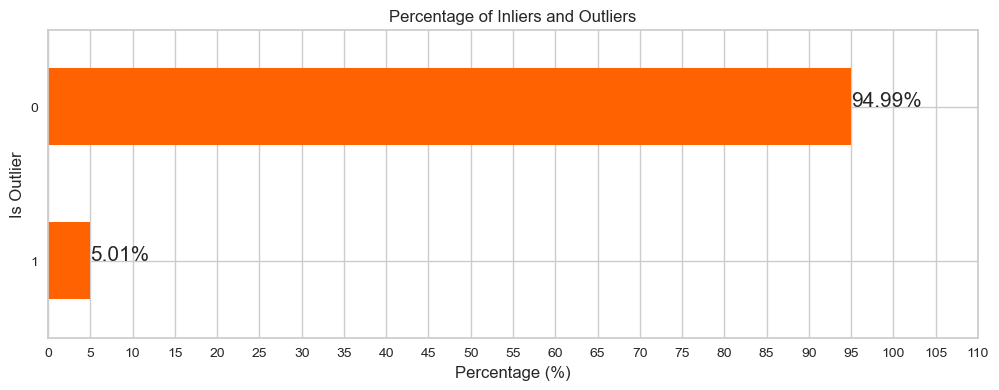

In [22]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [23]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [24]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

6560

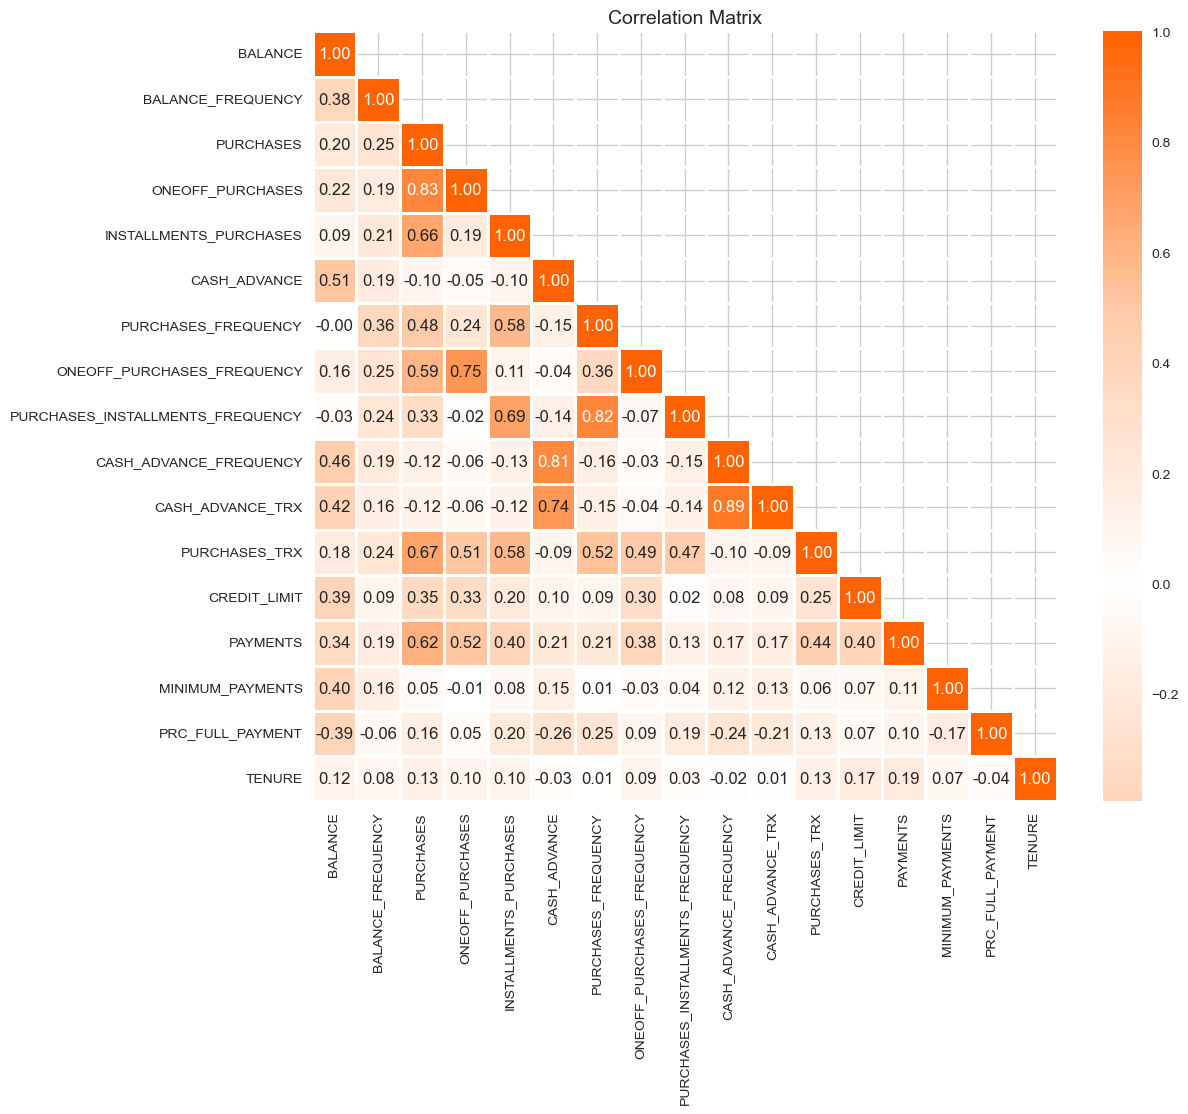

In [25]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CUST_ID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [26]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENTURE']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182  -0.884908         -0.746499   
1  C10003  2495.148862                1.0  -0.189131          0.401525   
2  C10004  1666.670542           0.636364   0.555984          1.479258   
3  C10005   817.714335                1.0  -0.966418         -0.722742   
4  C10006  1809.828751                1.0   0.385861         -0.746499   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.646728     -0.560719            -1.349990   
1               -0.843985     -0.560719             1.081323   
2               -0.843985      0.000296            -1.593123   
3               -0.843985     -0.560719            -1.593123   
4                1.912816     -0.560719             0.108799   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.808140                         -0.984943   
1                    2.417273                         -1.197562   
2                   -0.539357                         -1.197562   
3                   -0.539357                         -1.197562   
4                   -0.808140                          0.290772   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.504061         -0.426254      -0.661043        1000.0   
1               -0.504061         -0.426254      -0.239612        7500.0   
2                0.054916         -0.169790      -0.703187        7500.0   
3               -0.504061         -0.426254      -0.703187        1200.0   
4               -0.504061         -0.426254      -0.408185        1800.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0  201.802084        139.509787               0.0  0.31816  
1  622.066742        627.284787               0.0  0.31816  
2         0.0        246.737259               0.0  0.31816  
3  678.334763        244.791237               0.0  0.31816  
4  1400.05777       2407.246035               0.0  0.31816

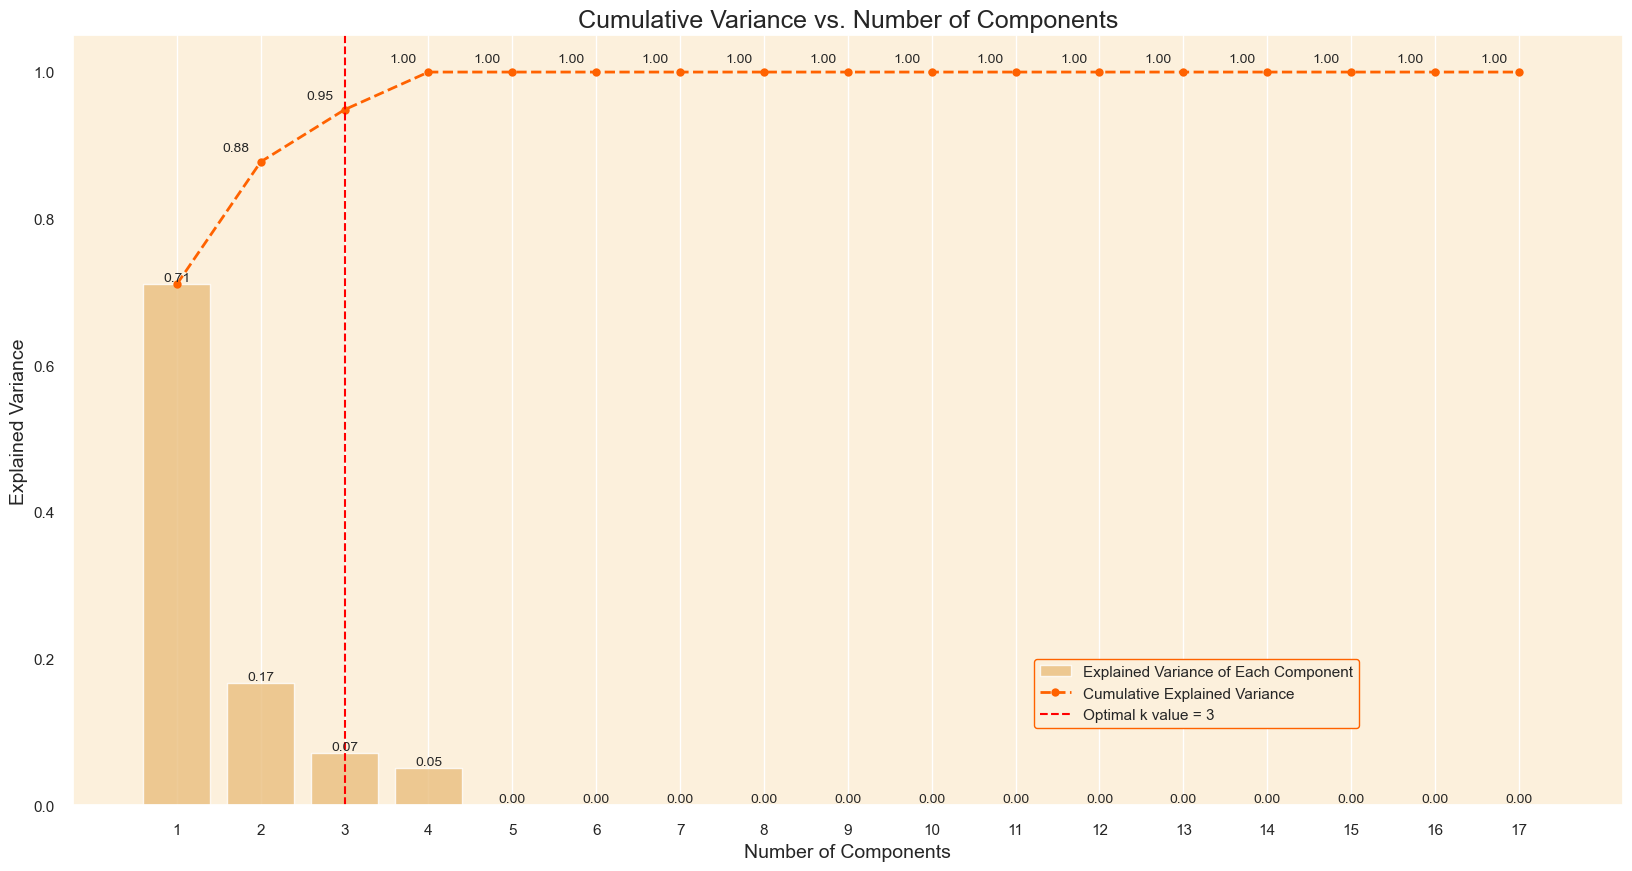

In [27]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CUST_ID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 3)
optimal_k = 3

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [28]:
# Creating a PCA object with 3 components
pca = PCA(n_components=3)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [29]:
customer_data_pca.head()

PC1          PC2          PC3
CUST_ID                                       
C10001  -3699.259310  -578.733385   506.083669
C10003   3122.951110    27.294292   539.196840
C10004   2865.969525  -740.675523  1257.845140
C10005  -3294.108267  -122.538276  -127.232670
C10006  -2314.943985  2216.123631  -280.763050

In [30]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

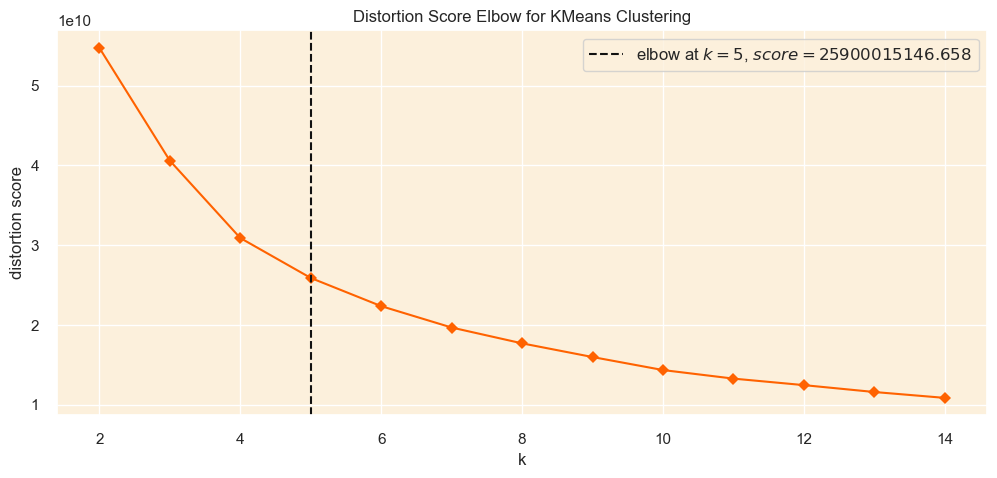

In [31]:

# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

In [32]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [39]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182        95.4               0.0   
1  C10003  2495.148862                1.0      773.17            773.17   
2  C10004  1666.670542           0.636364      1499.0            1499.0   
3  C10005   817.714335                1.0        16.0              16.0   
4  C10006  1809.828751                1.0     1333.28               0.0   
5  C10007   627.260806                1.0  3313.37625        2136.34375   
6  C10008  1823.652743                1.0       436.2               0.0   
7  C10009  1014.926473                1.0      861.49            661.49   
8  C10010   152.225975           0.545455      1281.6            1281.6   
9  C10011  1293.124939                1.0      920.12               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   
1                     0.0           0.0                  1.0   
2                     0.0    205.788017             0.083333   
3                     0.0           0.0             0.083333   
4                 1333.28           0.0             0.666667   
5                  688.38           0.0                  1.0   
6                   436.2           0.0                  1.0   
7                   200.0           0.0             0.333333   
8                     0.0           0.0             0.166667   
9                  920.12           0.0                  1.0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         1.0                               0.0   
2                    0.083333                               0.0   
3                    0.083333                               0.0   
4                         0.0                          0.583333   
5                         1.0                               1.0   
6                         0.0                               1.0   
7                    0.083333                              0.25   
8                    0.166667                               0.0   
9                         0.0                               1.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   
1                     0.0                 0             12        7500.0   
2                0.083333                 1              1        7500.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              8        1800.0   
5                     0.0                 0             64       13500.0   
6                     0.0                 0             12        2300.0   
7                     0.0                 0              5        7000.0   
8                     0.0                 0              3       11000.0   
9                     0.0                 0             12        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787               0.0      12        2  
1   622.066742        627.284787               0.0      12        0  
2          0.0        246.737259               0.0      12        0  
3   678.334763        244.791237               0.0      12        2  
4   1400.05777       2407.246035               0.0      12        2  
5  4267.899279        198.065894               1.0      12        1  
6   679.065082         532.03399               0.0      12        2  
7   688.278568        311.963409               0.0      12        0  
8  1164.770591        100.302262               0.0      12        1  
9  1083.301007       2172.697765               0.0      12        2

In [34]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [35]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

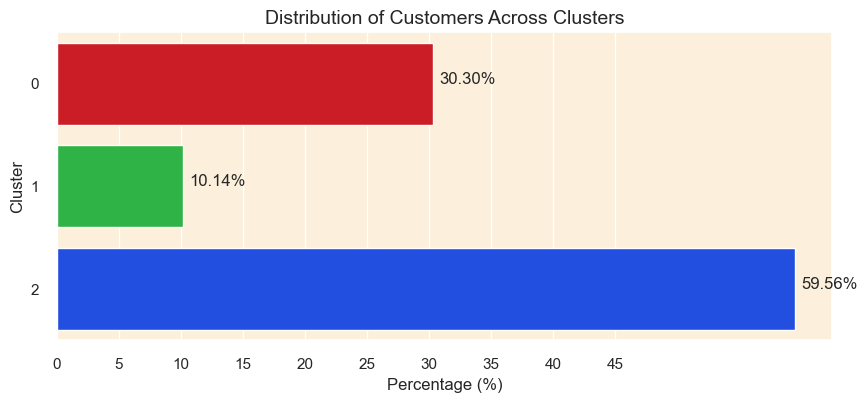

In [36]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [37]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        6560        |
|    Silhouette Score     | 0.4623473897159082 |
| Calinski Harabasz Score | 5777.726990435214  |
|  Davies Bouldin Score   | 0.9001198153931907 |
+-------------------------+--------------------+


In [38]:
### These metrics provide insights into the quality of clustering and the distribution of customers across 
### different clusters. A higher Silhouette Score indicates better separation between clusters, 
### while higher Calinski Harabasz Score and lower Davies Bouldin Score indicate better clustering performance.

In [43]:
### Conclusion

### Cluster 0: This cluster includes customers with moderate to high balance and purchase activity. 
### They have a relatively high frequency of purchases and a mix of one-off and installment purchases. 
### Their cash advance activity is low, and they tend to have a moderate credit limit. 
### They make regular payments but may have a higher minimum payment ratio.


### Cluster 1: Customers in this cluster exhibit high purchase activity, with a high frequency of purchases, 
### particularly one-off purchases. They have a relatively low balance and cash advance activity. 
### Their credit limit is generally high, and they make regular payments, with a lower minimum payment ratio.


### Cluster 2: This cluster represents customers with relatively low balance and purchase activity. 
### They have a low frequency of purchases and minimal cash advance activity. 
### Their credit limit tends to be lower compared to other clusters. 
### They make regular payments, with a moderate minimum payment ratio.